In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.max_columns', None)
%matplotlib inline

## Leitura dos dados
- Dados de notificações de todo o país - 2007 a 2019
- Dados atualizados em 15/09/2020, de acordo com metadados fornecidos pelo SINAN no momento do download.
    - Instruções em `../data/README.md`

In [2]:
path_leivis = '../data/interim/leivis'
path_dicionario = '../data/dicionario.csv'

df = pd.read_csv(f'{path_leivis}/interim_leivis.csv', low_memory=False).drop('Unnamed: 0', axis=1)

mn = pd.read_csv('../data/processed/processed_municipios.csv')
mun_pa = mn.loc[mn.estado == 'Pará', ['ibge_code', 'municipio']].set_index('ibge_code').to_dict()['municipio']

# dicionário dos dados: para facilitar consulta apenas
dic = pd.read_csv(path_dicionario, sep='\t')
dic.columns = ['id', 'tipo', 'categorias', 'descricao', 'caracteristicas', 'dbf']
cols = list(set(dic.dbf).intersection(set(df.columns)))
dic = dic.set_index('dbf')
dic = dic.loc[cols, ['categorias', 'descricao', 'caracteristicas']]

In [3]:
display(df.columns)
print(f'Consumo de memória em MB: {round(df.memory_usage(deep=True).sum() / (1024*1024), 2)} MB')
print(f'tamanho original da base: {df.shape}')



Index(['TP_NOT', 'ID_AGRAVO', 'DT_NOTIFIC', 'SEM_NOT', 'NU_ANO', 'SG_UF_NOT',
       'ID_MUNICIP', 'ID_REGIONA', 'DT_SIN_PRI', 'SEM_PRI', 'DT_NASC',
       'NU_IDADE_N', 'CS_SEXO', 'CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N', 'SG_UF',
       'ID_MN_RESI', 'ID_RG_RESI', 'ID_PAIS', 'NDUPLIC_N', 'CS_FLXRET',
       'FLXRECEBI', 'MIGRADO_W', 'DT_INVEST', 'ID_OCUPA_N', 'FEBRE',
       'FRAQUEZA', 'EDEMA', 'EMAGRA', 'TOSSE', 'PALIDEZ', 'BACO', 'INFECCIOSO',
       'FEN_HEMORR', 'FIGADO', 'ICTERICIA', 'OUTROS', 'OUTROS_ESP', 'HIV',
       'DIAG_PAR_N', 'IFI', 'OUTRO', 'ENTRADA', 'TRATAMENTO', 'DROGA', 'PESO',
       'DOSE', 'AMPOLAS', 'FALENCIA', 'CLASSI_FIN', 'CRITERIO', 'TPAUTOCTO',
       'COUFINF', 'COPAISINF', 'COMUNINF', 'DOENCA_TRA', 'EVOLUCAO',
       'DT_OBITO', 'DT_ENCERRA', 'DT_DESLC1', 'DS_MUN_1', 'CO_UF_1',
       'CO_PAIS_1', 'DS_TRANS_1', 'DT_DESLC2', 'DS_MUN_2', 'CO_UF_2',
       'CO_PAIS_2', 'DS_TRANS_2', 'DT_DESLC3', 'DS_MUN_3', 'CO_UF_3',
       'CO_PAIS_3', 'DS_TRANS_3'],
      

Consumo de memória em MB: 146.93 MB
tamanho original da base: (122502, 75)


### Visualizando a descrição dos dados junto com o dicionário 
corra as células para ver descrição das variáveis

In [4]:
# do tipo objeto
pd.concat([
    df.describe(include='object').T, dic.loc[df.describe(include='object').T.index, :]
], axis=1
)

,count,unique,top,freq,categorias,descricao,caracteristicas
ID_AGRAVO,122502,1,B550,122502,B55.0 – Leishmaniose Visceral,Agravo/doença,NaN
DT_NOTIFIC,122502,4732,2019-09-05,144,NaN,Data da Notificação: data e hora,NaN
DT_SIN_PRI,122502,5093,2019-09-05,114,NaN,Data dos Primeiros Sintomas,NaN
DT_NASC,121218,29430,2006-06-29,24,NaN,Data de Nascimento do Paciente,NaN
CS_SEXO,122502,3,M,74367,\nM - Masculino\nF - Feminino\nI - Ignorado\n,Sexo do paciente,NaN
DT_INVEST,98931,4058,2019-09-05,142,NaN,Data em que ocorreu a investigação – informar a data da 1a visita ao paciente,Campo obrigatório\nData da investigação > ou = data\nda notificação
ID_OCUPA_N,39200,1341,999991.0,7552,NaN,"Informar a atividade exercida pelo paciente\nno setor formal, informal\nou autônomo ou sua última atividade exercida\nquando paciente for desempregado. O ramo\nde atividade econômica do paciente refere-se as\natividades econômicas desenvolvidas nos\nprocessos de produção do setor primário\n(agricultura e extrativismo); secundário\n(indústria) ou terciário\n(serviços e comércio)",NaN
OUTROS_ESP,23364,8217,DOR ABDOMINAL,1641,NaN,Especificar outros sinais\ne sintomas que o\npaciente apresenta,Campo essencial. Se campo\nSinais e Sintomas(Outros)=1\n(sim).
TRATAMENTO,34320,3619,2018-03-23,28,NaN,Informar a data do início do tratamento,Campo essencial\nData deve ser >= a data da\nnotificação
DT_OBITO,5384,2624,2017-05-08,9,NaN,Informar a data do\nÓbito,Campo Obrigatório se\ncampo Evolução do\nCaso = 3 ou 4 (óbito)\nData do Óbito deve ser\nmaior ou igual à Data\ndos Primeiros Sintomas\nCampo habilitado se\ncampo Evolução= 3-\nÓbito por LV ou 4-Óbito\npor outras causas.\n


In [5]:
# do tipo numérico
pd.concat([
    df.describe().loc[['count', 'mean', 'std', 'min', 'max'], :].T, dic.loc[df.describe().T.index, :]
], axis=1
)

,count,mean,std,min,max,categorias,descricao,caracteristicas
TP_NOT,122502.0,2.000000,0.000000,2.0,2.0,2 – Individual,Tipo da notificação,NaN
SEM_NOT,122502.0,200976.552105,8759.347315,814.0,202001.0,NaN,Semanas do calendário\nEpidemiológico\npadronizado.Semana epidemiológica que o caso\nfoi notificado.,NaN
NU_ANO,122502.0,2013.340264,3.662893,2007.0,2019.0,NaN,NaN,NaN
SG_UF_NOT,122502.0,25.278363,9.909309,11.0,53.0,NaN,Sigla da UF de Notificação,NaN
ID_MUNICIP,122502.0,253869.190919,99361.701741,110004.0,530010.0,NaN,Id do município de Notificação (código IBGE),NaN
ID_REGIONA,96817.0,1577.908126,502.239498,1331.0,6256.0,Campo com código da regional de saúde da tabela de município do sistema,Regional de saúde onde está localizado o município da unidade de saúde ou outra fonte notificadora,NaN
SEM_PRI,122502.0,200904.648145,9390.154690,644.0,202001.0,Semana epidemiológica dos\nprimeiros sintomas/ diagnósticos.\n(campo interno),\nSemanas do calendário\nepidemiológico padronizado. Semana epidemiológica dos números\nsintomas.,NaN
NU_IDADE_N,122502.0,3942.691279,307.049248,5.0,4120.0,NaN,NaN,NaN
CS_GESTANT,122501.0,5.895323,0.615877,1.0,9.0,1-1oTrimestre\n2-2oTrimestre\n3-3oTrimestre\n4- Idade gestacional Ignorada\n5-Não\n6- Não se aplica\n9-Ignorado\n,Se paciente é gestante,NaN
CS_RACA,119557.0,3.664788,1.785568,1.0,9.0,\n1-Branca\n4-Parda\n2-Preta\n3-Amarela\n5-Indígena \n9- Ignorado,Raça/Cor,NaN


### Atualizando os nomes das colunas

In [6]:
df.columns = ['TP_NOT', 'ID_AGRAVO', 'DT_NOT', 'SEMANA_NOT', 'ANO', 'CO_UF_NOT',
               'CO_MN_NOT', 'ID_REGIONA', 'DT_PRI_SIN', 'SEMANA_PRI_SIN', 'DT_NASC',
               'NU_IDADE_N', 'CS_SEXO', 'CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N', 'CO_UF_RESI',
               'CO_MN_RESI', 'ID_RG_RESI', 'CO_PAIS', 'NDUPLIC_N', 'CS_FLXRET',
               'FLXRECEBI', 'MIGRADO_W', 'DT_INVEST', 'ID_OCUPA_N', 'FEBRE',
               'FRAQUEZA', 'EDEMA', 'EMAGRECIMENTO', 'TOSSE', 'PALIDEZ', 'BACO', 'INFECCIOSO',
               'FEN_HEMORR', 'FIGADO', 'ICTERICIA', 'OUTROS', 'OUTROS_ESP', 'HIV',
               'DIAG_PARASITOLOGICO', 'IFI', 'OUTRO', 'ENTRADA', 'TRATAMENTO', 'DROGA', 'PESO',
               'DOSE', 'AMPOLAS', 'FALENCIA', 'CLASSI_FIN', 'CRITERIO', 'TPAUTOCTO',
               'CO_UF_INF', 'CO_PAIS_INF', 'CO_MN_INF', 'DOENCA_TRABALHO', 'EVOLUCAO',
               'DT_OBITO', 'DT_ENCERRAMENTO', 'DT_DESLC1', 'DS_MUN_1', 'CO_UF_1',
               'CO_PAIS_1', 'DS_TRANS_1', 'DT_DESLC2', 'DS_MUN_2', 'CO_UF_2',
               'CO_PAIS_2', 'DS_TRANS_2', 'DT_DESLC3', 'DS_MUN_3', 'CO_UF_3',
               'CO_PAIS_3', 'DS_TRANS_3'
              ]
ufs = {
    11: 'RO', 12: 'AC', 13: 'AM', 14: 'RR', 15: 'PA', 16: 'AP', 17: 'TO', 21: 'MA', 22: 'PI', 23: 'CE',
    24: 'RN', 25: 'PB', 26: 'PE', 27: 'AL', 28: 'SE', 29: 'BA', 31: 'MG', 32: 'ES', 33: 'RJ', 35: 'SP',
    41: 'PR', 42: 'SC', 43: 'RS', 50: 'MT', 51: 'MS', 52: 'GO', 53: 'DF'
}

## Imputa ou Corrige os Campos de UF

Ex.:
- campo UF_INF está vazio, mas o campo MN_INF está presente. A partir deste é possível extrair o estado e preencher o campo vazio.
- se o codigo do município de notificação começa com 15, por exemplo, significa que a uf de notificação também tem que ser 15. Este código testa isso e faz correção. 
#### Qual impacto?
> Pouco. Para o indicador de incidência os dados são agregados por município de infecção. Mas se em algum momento alguma seleção, verificação nos dados for realizada pelo código da UF poderá ter resultado distorcido.
>
>- CO_UF_NOT de acordo com CO_MN_NOT
>- CO_UF_RESI de acordo com CO_MN_RESI
>- CO_UF_INF de acordo com CO_MN_INF
>
> No Pará somente um registro foi identificado. Município de residência é Tomé-Açu-PA e uf de residência é Pernambuco (26).

In [7]:
def fix_co_uf(uf):  
    c_resi = (df.CO_MN_RESI.astype('string').str.startswith(str(uf)) & (df.CO_UF_RESI != uf))
    c_not = (df.CO_MN_NOT.astype('string').str.startswith(str(uf)) & (df.CO_UF_NOT != uf))
    c_inf = (df.CO_MN_INF.astype('string').str.startswith(str(uf)) & (df.CO_UF_INF != uf))
    
    if df.loc[c_resi, :].shape[0] > 0:
        print(f"CO_UF_RESI: {uf}; shape: {df.loc[c_resi, :].shape}")
        df.loc[c_resi, 'CO_UF_RESI'] = uf
        
    if df.loc[c_not, :].shape[0] > 0:
        print(f"CO_UF_NOT: {uf}; shape: {c_not, :].shape}")
        df.loc[c_not, 'CO_UF_NOT'] = uf
        
    if df.loc[c_inf, :].shape[0] > 0:
        print(f"CO_UF_INF: {uf}; shape: {df.loc[c_inf, :].shape}")
        df.loc[c_inf, 'CO_UF_INF'] = uf  
        

for it in set(
    np.concatenate((
        df.CO_UF_INF.dropna().unique(),
        df.CO_UF_RESI.dropna().unique(),
        df.CO_UF_NOT.dropna().unique()
    ))
):
    fix_co_uf(int(it))

CO_UF_RESI: 15; shape: (1, 75)
CO_UF_INF: 21; shape: (1, 75)
CO_UF_INF: 26; shape: (2, 75)
CO_UF_INF: 29; shape: (2, 75)
CO_UF_INF: 51; shape: (1, 75)
CO_UF_INF: 52; shape: (1, 75)


In [8]:
print('Casos agrupados por tipo de CLASSI_FIN antes de remover 43 duplicações')
display(
    pd.concat([
        df.loc[:, 'CLASSI_FIN'].value_counts(dropna=False).to_frame(name='Brasil'),
        df.loc[(df.CO_UF_INF == 15), 'CLASSI_FIN'].value_counts(dropna=False).to_frame('Pará')
    ], axis=1).fillna(0).T
)
print('Casos confirmados agrupados por tipo de ENTRADA antes de remover 43 duplicações')
display(
    pd.concat([
        df.loc[(df.CLASSI_FIN == 1), 'ENTRADA'].value_counts(dropna=False).to_frame(name='Brasil'),
        df.loc[(df.CLASSI_FIN == 1) & (df.CO_UF_INF == 15), 'ENTRADA'].value_counts(dropna=False).to_frame('Pará')
    ], axis=1).fillna(0).T    
)

Casos agrupados por tipo de CLASSI_FIN antes de remover 43 duplicações


,1.0,2.0,8.0,NaN
Brasil,47853.0,65326.0,4371.0,4952.0
Pará,4445.0,0.0,78.0,48.0


Casos confirmados agrupados por tipo de ENTRADA antes de remover 43 duplicações


,1.0,2.0,3.0,9.0,NaN
Brasil,43309,2215,732,848,749
Pará,4162,102,54,106,21


## Excluindo duplicidades: de acordo com coluna `NDUPLIC_N`
- se 0 ou branco: não identificado
- se igual a 2.0, é duplicidade
- se igual a 1.0, não é duplicidade
segundo o dicionário de dados

> nenhum registro dos duplicados tem município de infecção no Pará.

In [9]:
print(f'{(df.NDUPLIC_N == 2).sum()} registros duplicados, nenhum tem co_uf_inf = 15 e 27 não possuem CO_INF.')
temp = df.loc[
    (df.NDUPLIC_N == 2), 'CO_UF_INF'
].value_counts(dropna=False)
temp.index = temp.index.map(ufs)
display(temp.to_frame('UF_INF dos duplicados x total').T)

df.drop(df.loc[df.NDUPLIC_N == 2, :].index, axis=0, inplace=True)

print('Casos agrupados por tipo de CLASSI_FIN após remover 43 duplicações')
display(
    pd.concat([
        df.loc[:, 'CLASSI_FIN'].value_counts(dropna=False).to_frame(name='Brasil'),
        df.loc[(df.CO_UF_INF == 15), 'CLASSI_FIN'].value_counts(dropna=False).to_frame('Pará')
    ], axis=1).fillna(0).T
)

print('Casos confirmados agrupados por tipo de ENTRADA após remover 43 duplicações')
display(
    pd.concat([
        df.loc[(df.CLASSI_FIN == 1), 'ENTRADA'].value_counts(dropna=False).to_frame(name='Brasil'),
        df.loc[(df.CLASSI_FIN == 1) & (df.CO_UF_INF == 15), 'ENTRADA'].value_counts(dropna=False).to_frame('Pará')
    ], axis=1).fillna(0).T
)

43 registros duplicados, nenhum tem co_uf_inf = 15 e 27 não possuem CO_INF.


,NaN,GO,MS,MG,PI,PE,SE,DF
UF_INF dos duplicados x total,27,5,4,3,1,1,1,1


Casos agrupados por tipo de CLASSI_FIN após remover 43 duplicações


,1.0,2.0,8.0,NaN
Brasil,47830.0,65323.0,4366.0,4940.0
Pará,4445.0,0.0,78.0,48.0


Casos confirmados agrupados por tipo de ENTRADA após remover 43 duplicações


,1.0,2.0,3.0,9.0,NaN
Brasil,43291,2214,731,846,748
Pará,4162,102,54,106,21


In [10]:
t = df.loc[
    (df.CLASSI_FIN == 1) & (df.ENTRADA == 1), :
].copy()
print('Porcentagem do total de casos novos confirmados de cada estado no período.')
t.CO_UF_INF = t.CO_UF_INF.map(ufs)
(t.groupby('CO_UF_INF')['ANO'].count().sort_values(ascending=False)/43291).to_frame('% casos').T

Porcentagem do total de casos novos confirmados de cada estado no período.


CO_UF_INF,MA,MG,CE,PA,TO,BA,PI,MT,SP,PE,RN,SE,AL,MS,PB,GO,RR,ES,RJ,DF,RS,PR,SC,AP
% casos,0.150909,0.120117,0.118962,0.09614,0.088194,0.080363,0.056663,0.050288,0.044651,0.022637,0.019011,0.016262,0.01185,0.009863,0.008662,0.008223,0.003973,0.001548,0.001132,0.001016,0.000924,0.000647,0.000092,0.000023


ANO,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
casos,0.073872,0.078076,0.082026,0.079185,0.088009,0.068167,0.073456,0.077545,0.074403,0.072186,0.094662,0.08004,0.058372


ANO,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
casos,3198,3380,3551,3428,3810,2951,3180,3357,3221,3125,4098,3465,2527


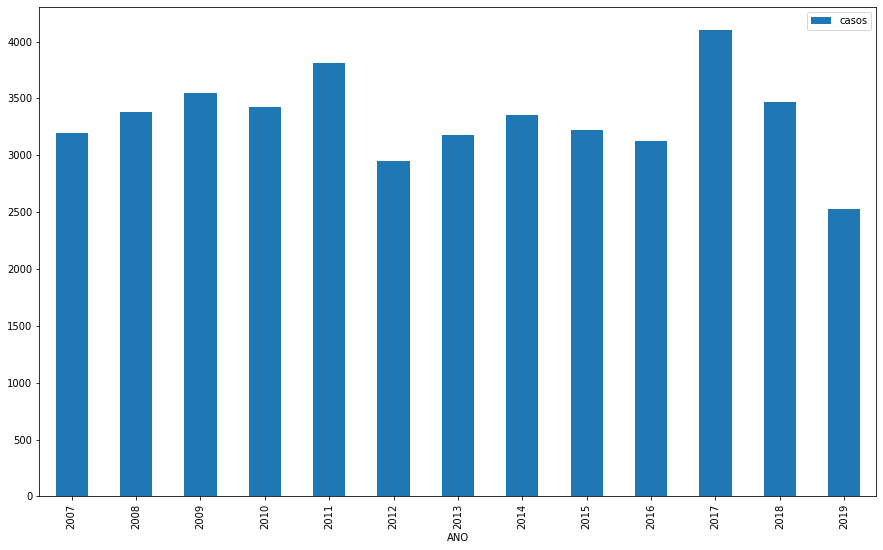

In [11]:
display(
    (t.groupby('ANO')['TP_NOT'].count().sort_values(ascending=False).to_frame('casos').sort_index()/43291).T,
    (t.groupby('ANO')['TP_NOT'].count().sort_values(ascending=False).to_frame('casos').sort_index()).T
    )
t.groupby('ANO')['TP_NOT'].count().sort_values(ascending=False).to_frame('casos').sort_index().plot(kind='bar',figsize=(15,9));



>__Total de municípios ignorados (terminados em 0000) por estado.
Eles não vão entrar no cálculo do indicador, porque não é possível saber qual o município de infecção.__
- Pará não possui caso com município de infecção ignorado. Não afeta.

In [12]:
temp = df.loc[
    (df.CLASSI_FIN == 1) & (df.ENTRADA == 1) & (df.CO_MN_INF.astype('string').str.contains('0000')), 
    'CO_UF_INF'
].value_counts()
temp.index = temp.index.map(ufs)
display(temp.to_frame('total municípios Inf. ignorados ').T)
#df.drop(df.loc[(df.CLASSI_FIN == 1) & (df.CO_MN_INF.astype('string').str.contains('0000')),:].index, inplace=True)

,BA,MG,TO,MA,MS,CE,PB,RJ,PR,GO,PI,SP
total municípios Inf. ignorados,7,6,4,4,2,2,2,1,1,1,1,1


>__Total de casos sem CO_MN_INF: o Pará tem apenas uma amostra para ser removida, é caso novo sem CO_MN_INF__

In [13]:
temp = df.loc[
    (df.CLASSI_FIN == 1) & (df.ENTRADA == 1) & (df.CO_MN_INF.isnull()), 
    'CO_UF_INF'
].value_counts()
temp.index = temp.index.map(ufs)
display(temp.to_frame('total casos sem CO_UF_INF').T)
#df.drop(df.loc[(df.CLASSI_FIN == 1) & (df.CO_MN_INF.isnull()), 'CO_UF_INF'].index, inplace=True)

,MS,PA,BA,MA,RR,CE
total casos sem CO_UF_INF,2,2,2,1,1,1


>__Municípios transferidos__

Estes são casos registrados em municípios que hoje pertencem a Tocantins, mas estão com o código de UF antigo (52 Goiás). O restante do código continua o mesmo, somente substitui 52 por 17.

Então 4 casos confirmados que estão computados como local de infecção GO vão para Tocantins. 

In [14]:
transferidos = pd.read_csv('../data/raw/transferidos_go-to.csv')
transferidos.columns = ['ibge_code','municipio']
transferidos = transferidos.set_index('ibge_code').to_dict()['municipio']

In [15]:
idx = df.loc[(~df.CO_MN_INF.map(transferidos).isnull()), :].index
temp = df.loc[idx, ['CO_UF_INF','CO_MN_INF', 'ENTRADA', 'CLASSI_FIN']]
temp['municipio'] = temp.CO_MN_INF.map(transferidos)
display(temp)

df.loc[idx, 'CO_MN_INF'] = df.loc[idx, 'CO_MN_INF'].astype(int).astype('string').str.replace('52', '17')
df.loc[idx, 'CO_UF_INF'] = 17


,CO_UF_INF,CO_MN_INF,ENTRADA,CLASSI_FIN,municipio
39294,52.0,520755.0,1.0,1.0,fátima
70637,52.0,522120.0,1.0,1.0,tocantinópolis
71364,52.0,520720.0,1.0,1.0,dois irmãos
96609,52.0,520210.0,1.0,1.0,araguaína


Total de casos confirmados dos municípios, por local de infecção. Top 25


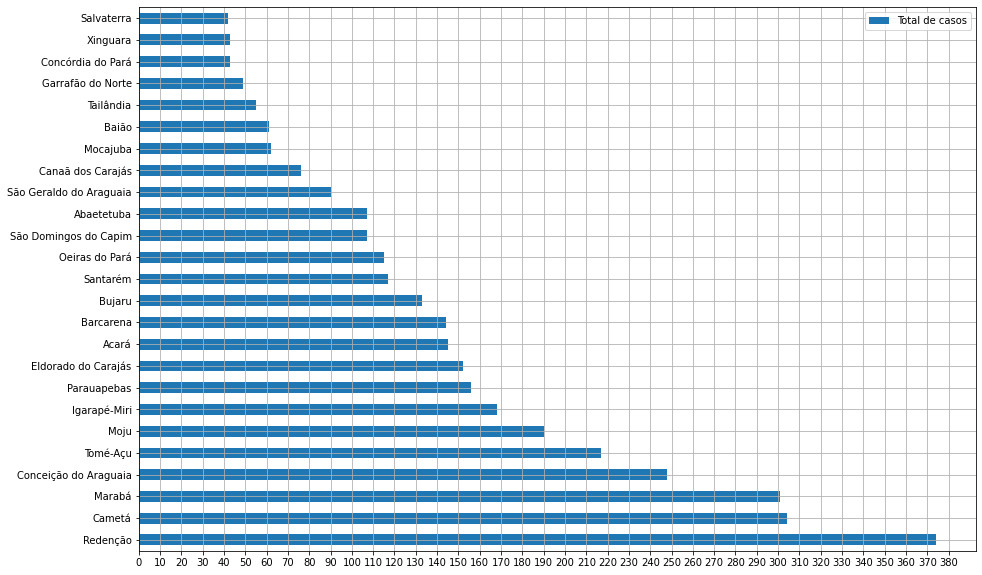

In [16]:
print('Total de casos confirmados dos municípios, por local de infecção. Top 25')
temp = df.loc[
    (df.CLASSI_FIN == 1) & 
    (df.ENTRADA == 1)  & 
    (df.CO_UF_INF == 15)
    , 'CO_MN_INF'].value_counts(dropna=False)
temp.name = 'Total de casos'
temp.index = temp.index.map(mun_pa)

temp.to_frame().head(25).plot(kind='barh', figsize=(15,10), grid=True, xticks=range(0, temp.max() + 10, 10));

### Resumo

Tem vários testes de consistência a serem feitos, mas o mais essencial é definir uma parcela de dados o mais confiável possível para analisar.

Campos importantes: 
Alguns campos são importantes para cálculo de alguns indicadores, entretanto há valores faltantes que limitam os dados para cálculo.

- `ENTRADA` se o caso é novo ou rescidiva.
- `CO_MN_INF`, `CO_UF_INF` (local de infecção)
- `CO_MN_RESI`, `CO_UF_RESI` (local residencia)

O estado do Pará:
- não possui casos duplicados: NDUPLIC_N = 2
- não possui casos com município de infecção ignorado
- possui apenas um caso novo com CO_MN_INF ausente: index 50507 (desconsiderado)
- total de 4.160 amostras no período 2007-2019 com local de infecção
***


`ENTRADA`

Questionamento: o que significa o valor transferência (3), em `ENTRADA`?
Seria um caso notificado em um local e o tratamento transferido para outro local?
Neste caso faz-se outra notificação no local atual de tratamento e teríamos duas p/ msm caso?
Ou atualizam alguns campos da notificação original?
> De qualquer forma o caderno de cálculo de indicadores do SUS diz para considerar apenas casos novos e/ou recidivas no cálculo dos principais indicadores.

- 1: caso novo; 
- 2: recidiva; 
- 3: transferência; 
- 9: ignorado.

Por enquanto serão desconsideradas amostras com entrada diferente de 1 para o cálculo do indicador.

Obs.: abaixo temos dentre os 54 casos do Pará com Entrada=3 casos onde o município de notificação, residência e infecção são os mesmos. Então seria transferência de onde? 

In [17]:
df.loc[
    (df.CLASSI_FIN == 1) & (df.ENTRADA == 3) & (df.CO_UF_INF == 15), 
    ['CO_UF_INF','CO_UF_RESI','CO_UF_NOT', 'CO_MN_INF','CO_MN_RESI','CO_MN_NOT', 'ANO', 'DT_NOT','ENTRADA']
]

,CO_UF_INF,CO_UF_RESI,CO_UF_NOT,CO_MN_INF,CO_MN_RESI,CO_MN_NOT,ANO,DT_NOT,ENTRADA
1458,15.0,15,15,150800,150800,150140,2009,2009-05-27,3.0
2188,15.0,15,15,150020,150020,150020,2009,2009-12-28,3.0
2203,15.0,15,15,150405,150405,150140,2009,2009-03-27,3.0
2211,15.0,15,15,150210,150520,150140,2009,2009-06-08,3.0
2268,15.0,15,15,150190,150650,150650,2009,2009-03-10,3.0
2682,15.0,15,15,150805,150805,150805,2009,2009-02-12,3.0
14126,15.0,15,15,150520,150520,150140,2019,2019-01-30,3.0
14527,15.0,15,15,150812,150812,150140,2019,2019-05-18,3.0
14657,15.0,15,35,150613,150613,350550,2019,2019-06-13,3.0
14665,15.0,15,15,150470,150470,150140,2019,2019-06-03,3.0


`CLASSI_FIN`

__Verificação do campo CLASSI_FIN__

- classificação final, CLASSI_FIN, é um campo condicional obrigatório
    - Se campo 35 (Diagnóstico parasitológico) ou 36 (Diagnóstico imunológico/IFI) ou 36 (Diagnóstico imunológico/outro) = 1: preencher automaticamente com 1 (confirmado).
    - Se todos os itens do campo 33 (Manifestações Clínicas) e 35 (Diagnóstico parasitológico) e 36 (Diagnóstico imunológico) = 2: preencher automaticamente com 2 (Descartado).
- 1 = confirmado; 
- 2 = descartado;
- 8 = ignorado.

Testar se há casos com CLASSI_FIN não atendendo aos critérios acima e imputar

> Este é um ponto delicado e que requer atenção, pois estamos supondo que o erro aconteceu no campo de classificação final e não no preenchimento dos outros campos.

***
__Qual o impacto no total de notificações do Pará se essas imputações forem feitas?__

1) Imputar como 'CONFIRMADO': se o registro tiver algum dos exames como positivo (IFI, parasitológico ou outro) e a classificação final for diferente de 1, ou seja, estiver em branco, como ignorado (8) ou descartado (2), automaticamente atualizar para confirmado (1)
#### Conclusão:
> Dentre os que tem CLASSI_FIN igual a 2 e que deveriam ser 1:
>- CO_UF_INF: Pará como local provável de infecção ganha mais `0` registro.
>- CO_UF_NOT: Pará como local de notificação ganha mais `40` registros.
>- Co_UF_RESI: Pará como local de residência ganha mais `40` registros.

> Dentre os que tem CLASSI_FIN igual a branco ou nulo e que deveriam ser 1:
>- CO_UF_INF: Pará como local provável de infecção ganha mais `1` registro (município Altamira, 150060).
>- CO_UF_NOT: Pará como local de notificação ganha mais `3` registros.
>- Co_UF_RESI: Pará como local de residência ganha mais `4` registros.

   
2) Imputar como 'DESCARTADO': se todos os campos de sintomas (manifestações clínicas) forem negativos (2) e exames IFI e parasitológicos também forem negativos (2) e a classificação final for diferente de 2, ou seja, estiver em branco, como ignorado (8) ou como confirmado (1), automaticamente atualizar para descartado (2).
#### Conclusão:
> Dentre os que tem CLASSI_FIN igual a 1 e deveriam ser 2:
>- CO_UF_INF: Pará como local provável de infecção perde `0` registro.
>- CO_UF_NOT: Pará como local de notificação perde `0` registros.
>- Co_UF_RESI: Pará como local de residência perde `0` registros.

> Dentre os que tem CLASSI_FIN igual a branco ou nulo e deveriam ser 2:
>- CO_UF_INF: Pará como local provável de infecção perde `0` registro.
>- CO_UF_NOT: Pará como local de notificação perde `0` registros.
>- Co_UF_RESI: Pará como local de residência perde `0` registros.

- corrigir o campo `CLASSI_FIN` de acordo com a regra do dicionário de dados adiciona `1` caso a mais no indicador que considerar o local de infecção, `43` casos ao cálculo de indicador que considerar local de notificação e `44` no que considerar local de residência. 

Obs. 1: o indicador taxa de incidência pode utiliziar o CO_UF_INF ou CO_UF_RESI: vamos utilizar o CO_UF_INF

Obs. 2: na tabela abaixo observe que dos registros recuperados como CONFIRMADOS poucos deles tem o campo CO_UF_INF, logo muitos deles serão descartados na hora de calcular o indicador que precisa deste campo. 

> ### Decisão: não imputar/atualizar campo CLASSI_FIN por enquanto.

### De acordo com as regras acima:
- verificar dentre os que têm CLASSI_FIN = 1 que deveria ter CLASSI_FIN = 2
- verificar dentre os que têm CLASSI_FIN = 2 que deveria ter CLASSI_FIN = 1
- verificar dentre os que têm CLASSI_FIN = 8 ou branco (nulo) que deveria ter CLASSI_FIN = 1 ou 2

In [18]:
c_1 = ((df.IFI == 1) | (df.DIAG_PARASITOLOGICO == 1) | (df.OUTRO == 1))
c_2 = (
    (df.FEBRE == 2) & (df.FRAQUEZA == 2) & (df.EDEMA == 2) & 
    (df.EMAGRECIMENTO == 2) & (df.TOSSE == 2) & (df.PALIDEZ == 2) & (df.BACO == 2) & 
    (df.INFECCIOSO == 2) & (df.FEN_HEMORR == 2) & (df.FIGADO == 2) & (df.ICTERICIA == 2) & 
    (df.OUTROS == 2) & (df.DIAG_PARASITOLOGICO == 2) & (df.IFI == 2)
)
c = ((~df.CO_MN_INF.astype('string').str.contains('0000')) & (~df.CO_MN_INF.isnull()))

- Dentre os casos com CLASSI_FIN = 1, confirmado, tem algum que deveria ser descartado? 
    - R. 2, mas entrada é ignorada.
- Tem algum com valor de UF = 15? 
    - R. nenhum

In [19]:
df.loc[
    (df.CLASSI_FIN == 1) & c & c_2, 
    ['CO_UF_INF', 'CO_UF_NOT', 'CO_UF_RESI', 'CO_MN_INF', 'CO_MN_NOT', 'CO_MN_RESI', 'ENTRADA']
]

,CO_UF_INF,CO_UF_NOT,CO_UF_RESI,CO_MN_INF,CO_MN_NOT,CO_MN_RESI,ENTRADA
71491,21.0,21,21,210043,211130,210043,9.0
116161,23.0,23,23,230470,230470,230470,9.0


- Dentre os casos com CLASSI_FIN = 2 tem algum que deveria ser confirmado?
    - nenhum
- Tem algum com valor de UF = 15 ?
    - nenhum

In [20]:
df.loc[
    (df.CLASSI_FIN == 2) & c & c_1, 
    ['CO_UF_INF', 'CO_UF_NOT', 'CO_UF_RESI', 'CO_MN_INF', 'CO_MN_NOT', 'CO_MN_RESI', 'ENTRADA','ANO']
]

,CO_UF_INF,CO_UF_NOT,CO_UF_RESI,CO_MN_INF,CO_MN_NOT,CO_MN_RESI,ENTRADA,ANO


- Dentre os casos com CLASSI_FIN nulo ou 8 tem algum que deveria ser 1 ou 2?
    - 24 seriam confirmados e 0, descartados.
- Tem algum com valor de UF = 15?
    - UF de infecção = 15: 1 apenas (município Altamira, 150060; index = 14060)

In [21]:

temp = pd.concat([
    df.loc[
        ((df.CLASSI_FIN == 8) | df.CLASSI_FIN.isnull()) & c & c_1, 
        'CO_UF_INF'
    ].value_counts().to_frame('nulo_branco > confirmado').T,
    df.loc[
        ((df.CLASSI_FIN == 8) | df.CLASSI_FIN.isnull()) & c & c_2, 
        'CO_UF_INF'
    ].value_counts().to_frame('nulo_branco > descartado').T
], axis=0).fillna(0)
temp.columns = temp.columns.map(ufs)

print(f"""Confirmados: mais {temp.iloc[0].sum()}\nDescartados: mais {temp.iloc[1].sum()}""")
temp

Confirmados: mais 24.0
Descartados: mais 0.0


,BA,MA,TO,CE,PI,MG,PE,RS,PA,RN
nulo_branco > confirmado,6.0,6.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0
nulo_branco > descartado,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
#verificando se ainda há nulos
(
    df.loc[(df.CO_MN_RESI.isnull()), :].shape,
    df.loc[(df.CO_MN_NOT.isnull()), :].shape,
    df.loc[(df.CO_MN_INF.isnull()), :].shape,
    df.loc[(df.CO_UF_RESI.isnull()), :].shape,
    df.loc[(df.CO_UF_NOT.isnull()), :].shape,
    df.loc[(df.CO_UF_INF.isnull()), :].shape  
)

((0, 75), (0, 75), (78598, 75), (0, 75), (0, 75), (78578, 75))

### corrigindo algumas inconsistências

- converter datas para datetime

In [23]:
datas = ['TRATAMENTO','DT_NOT', 'DT_PRI_SIN', 'DT_NASC', 'DT_INVEST', 'DT_OBITO', 'DT_ENCERRAMENTO', 'DT_DESLC1', 'DT_DESLC2', 'DT_DESLC3']

locs = {}
for col in datas:
    if ((df[col].astype('string').str.len() < 10) & (~df[col].astype('string').str.contains('<NA>'))).any():
        idx = df.loc[df[col].astype('string').str.len() < 10, :].index.values.tolist()
        for i in idx:
            locs.update({i: col})

if locs:
    display(df.loc[locs.keys(), datas])

    for k,v in locs.items():
        df.loc[k, v] = np.nan

    display(df.loc[locs.keys(), datas])

# converte df datetime
df[datas] = df[datas].apply(lambda x: pd.to_datetime(x), axis=1)

,TRATAMENTO,DT_NOT,DT_PRI_SIN,DT_NASC,DT_INVEST,DT_OBITO,DT_ENCERRAMENTO,DT_DESLC1,DT_DESLC2,DT_DESLC3
4971,2012-04-24,2012-03-28,2012-03-13,1981-05-09,2012-04-24,NaN,2012-04-24,2011-09-15,211-10-10,2012-01-09
33592,2015-08-21,2015-08-21,2015-08-18,2014-10-22,2015-08-21,NaN,2015-09-29,2014-10-22,205-06-01,NaN


,TRATAMENTO,DT_NOT,DT_PRI_SIN,DT_NASC,DT_INVEST,DT_OBITO,DT_ENCERRAMENTO,DT_DESLC1,DT_DESLC2,DT_DESLC3
4971,2012-04-24,2012-03-28,2012-03-13,1981-05-09,2012-04-24,NaN,2012-04-24,2011-09-15,NaN,2012-01-09
33592,2015-08-21,2015-08-21,2015-08-18,2014-10-22,2015-08-21,NaN,2015-09-29,2014-10-22,NaN,NaN


In [24]:
(
    ('SEMANA_NOT', 'len <> de 6 dígitos' if (df.SEMANA_NOT.astype('string').str.len() != 6).any() else 'Passed'),
    ('SEMANA_PRI_SIN', 'len <> de 6 dígitos' if (df.SEMANA_PRI_SIN.astype('string').str.len() != 6).any() else 'Passed'),
    ('ANO', 'len <> de 4 dígitos' if (df.ANO.astype('string').str.len() != 4).any() else 'Passed'),
    ('CO_MN_NOT', 'len <> de 6 dígitos' if (df.CO_MN_NOT.astype('string').str.len() != 6).any() else 'Passed'),
    ('CO_MN_RESI', 'len <> de 6 dígitos' if (df.CO_MN_RESI.astype('string').str.len() != 6).any() else 'Passed'),
    ('CO_MN_INF', 'len <> de 6 dígitos' if (df.CO_MN_INF.astype('string').str.len() != 6).any() else 'Passed'),
)

(('SEMANA_NOT', 'len <> de 6 dígitos'),
 ('SEMANA_PRI_SIN', 'len <> de 6 dígitos'),
 ('ANO', 'Passed'),
 ('CO_MN_NOT', 'Passed'),
 ('CO_MN_RESI', 'Passed'),
 ('CO_MN_INF', 'len <> de 6 dígitos'))

inconsistência simples de resolver, algumas semanas estão apenas com o final do ano concatenado à semana epidemiológica. Basta concatenar o ano com o final da coluna `SEMANA_NOT` 

In [25]:
c = (df.SEMANA_NOT.astype('string').str.len() != 6) | (df.SEMANA_PRI_SIN.astype('string').str.len() != 6)
display(df.loc[c, ['DT_NOT','SEMANA_NOT', 'DT_PRI_SIN','SEMANA_PRI_SIN']])

,DT_NOT,SEMANA_NOT,DT_PRI_SIN,SEMANA_PRI_SIN
47,2012-10-30,1244,2012-10-22,1243
52,2012-10-30,1244,2012-10-10,1241
68,2012-09-03,1236,2012-08-12,1233
1011,2011-01-18,1103,2010-10-18,1042
1192,2013-10-25,1343,2013-10-12,1341
...,...,...,...,...
119529,2012-03-15,1211,2012-02-16,1207
119713,2012-09-20,1238,2012-03-17,1211
119921,2012-09-03,1236,2012-08-02,1231
120051,2017-11-23,1747,2017-10-26,1743


In [26]:
df.loc[
    (df.SEMANA_NOT.astype('string').str.len() == 4), 'SEMANA_NOT'
] = '20' + df.loc[
    (df.SEMANA_NOT.astype('string').str.len() == 4), 'SEMANA_NOT'
].astype('string')
df.loc[
    (df.SEMANA_NOT.astype('string').str.len() == 3), 'SEMANA_NOT'
] = '200' + df.loc[
    (df.SEMANA_NOT.astype('string').str.len() == 3), 'SEMANA_NOT'
].astype('string')

In [27]:
df.loc[
    (df.SEMANA_PRI_SIN.astype('string').str.len() == 4), 'SEMANA_PRI_SIN'
] = '20' + df.loc[
    (df.SEMANA_PRI_SIN.astype('string').str.len() == 4), 'SEMANA_PRI_SIN'
].astype('string')
df.loc[
    (df.SEMANA_PRI_SIN.astype('string').str.len() == 3), 'SEMANA_PRI_SIN'
] = '200' + df.loc[
    (df.SEMANA_PRI_SIN.astype('string').str.len() == 3), 'SEMANA_PRI_SIN'
].astype('string')

### criando a coluna idade 

- idade na data de notificação 

In [28]:
df['IDADE'] = np.round( (df.DT_NOT - df.DT_NASC) / np.timedelta64('1', 'Y'), 6)

In [29]:
display(df.loc[:, ['DT_NASC', 'DT_NOT', 'NU_IDADE_N', 'IDADE']].isnull().sum())
df.loc[(~df.NU_IDADE_N.isnull()) & (df.IDADE.isnull()), 'NU_IDADE_N'].shape

DT_NASC       1284
DT_NOT           0
NU_IDADE_N       0
IDADE         1284
dtype: int64

(1284,)

- algumas idades ficaram nulas pela falta de uma data ou outra, possivelmente a data de nascimento. Entretanto, essas mesmas amostras com essa falta possuem o campo `NU_IDADE_N`, que é preenchido manualmente por quem faz a notificação. Podemos extrair a idade desse campo e preencher as 373 amostras que ficaram sem `IDADE`. 
    - se começar com 1: idade é dada em **horas**
    - se começar com 2: idade é dada em **dias**
    - se começar com 3: idade é dada em **meses**
    - se começar com 4: idade é dada em **anos**

In [30]:
for index, row in df.loc[df.IDADE.isnull(), ['NU_IDADE_N', 'IDADE']].iterrows():
    if str(df.loc[index, 'NU_IDADE_N']).startswith('4'):
        df.loc[index, 'IDADE'] = int(str(df.loc[index, 'NU_IDADE_N'])[1:])
    if str(df.loc[index, 'NU_IDADE_N']).startswith('3'):
        df.loc[index, 'IDADE'] = np.round(int(str(df.loc[index, 'NU_IDADE_N'])[1:]) / 12, 6)
    if str(df.loc[index, 'NU_IDADE_N']).startswith('2'):
        df.loc[index, 'IDADE'] = np.round(int(str(df.loc[index, 'NU_IDADE_N'])[1:]) / 365, 6)
    if str(df.loc[index, 'NU_IDADE_N']).startswith('1'):
        df.loc[index, 'IDADE'] = 0

In [31]:
df.loc[df.IDADE.isnull(), 'NU_IDADE_N']

Series([], Name: NU_IDADE_N, dtype: int64)

In [32]:
print('Casos agrupados por tipo de CLASSI_FIN')
display(
    pd.concat([
        df.loc[:, 'CLASSI_FIN'].value_counts(dropna=False).to_frame(name='Brasil'),
        df.loc[(df.CO_UF_INF == 15), 'CLASSI_FIN'].value_counts(dropna=False).to_frame('Pará')
    ], axis=1).fillna(0).T
)
print('Casos confirmados agrupados por tipo de ENTRADA')
display(
    pd.concat([
        df.loc[(df.CLASSI_FIN == 1), 'ENTRADA'].value_counts(dropna=False).to_frame(name='Brasil'),
        df.loc[(df.CLASSI_FIN == 1) & (df.CO_UF_INF == 15), 'ENTRADA'].value_counts(dropna=False).to_frame('Pará')
    ], axis=1).fillna(0).T
)

Casos agrupados por tipo de CLASSI_FIN


,1.0,2.0,8.0,NaN
Brasil,47830.0,65323.0,4366.0,4940.0
Pará,4445.0,0.0,78.0,48.0


Casos confirmados agrupados por tipo de ENTRADA


,1.0,2.0,3.0,9.0,NaN
Brasil,43291,2214,731,846,748
Pará,4162,102,54,106,21


In [33]:
df = df.loc[df.CLASSI_FIN == 1, :].copy()

## População Estimada por Município/Ano
- A partir de 2017 os códigos passaram a ter 7 dígitos. Um município com 6 passou a ter 7 e está sendo considerado um novo. Corrigir. Basta retirar o último dígito, verificador.

- Alguns municípios, 6 deles, não tem estimativa populacional entre 2007 e 2011. Provavelmente por não terem tido senso nestes anos, recém criados. 

In [34]:
populacao = pd.read_csv('../data/interim/populacao/interim_populacao.csv')
populacao.MUNIC_RES = populacao.MUNIC_RES.apply(lambda x: int(str(x)[:6]))
populacao = pd.pivot_table(populacao, values='POPULACAO', index='MUNIC_RES', columns='ANO')

Há 6 municípios sem estimativa populacional. Um deles é Mojuí dos Campos, Pará. O ano sem estimativa resultará em taxa 0. Neste caso Mojuí não tem casos, então tanto faz.

In [35]:
# verificando municípios que possuem algum ano sem estimativa, totalizando 6
populacao.loc[populacao.isnull().sum(axis=1) > 0,:]

ANO,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
MUNIC_RES,,,,,,,,,,,,,
150475,NaN,NaN,NaN,NaN,NaN,15018.0,15232.0,15341.0,15446.0,15548.0,15646.0,15982.0,16084.0
220672,NaN,8501.0,7895.0,8039.0,8149.0,8227.0,8289.0,8330.0,8366.0,8398.0,8425.0,8536.0,8570.0
421265,NaN,NaN,NaN,NaN,NaN,9416.0,9687.0,9761.0,9835.0,9908.0,9980.0,10022.0,10091.0
422000,NaN,NaN,NaN,NaN,NaN,11136.0,11628.0,11824.0,12018.0,12212.0,12403.0,12570.0,12760.0
431454,NaN,NaN,NaN,NaN,NaN,2578.0,2681.0,2800.0,2824.0,2847.0,2868.0,2968.0,3003.0
500627,NaN,NaN,NaN,NaN,NaN,4723.0,4942.0,5047.0,5150.0,5251.0,5350.0,5455.0,5555.0


## Informações sobre Municípios

In [36]:
municipios = pd.read_excel('../data/raw/IBGE_BRASIL_MUNICIPIO.xls')
municipios = municipios.loc[:, ['Código Município Completo','Nome_Município', 'Nome_UF', 'Nome_Mesorregião', 'Nome_Microrregião']]
municipios.columns = ['ibge_code', 'municipio','estado','mesorregiao','microrregiao']

municipios.ibge_code = municipios.ibge_code.apply(lambda x: str(x)[:6])
municipios.head()

,ibge_code,municipio,estado,mesorregiao,microrregiao
0,110001,Alta Floresta D'Oeste,Rondônia,Leste Rondoniense,Cacoal
1,110037,Alto Alegre dos Parecis,Rondônia,Leste Rondoniense,Cacoal
2,110040,Alto Paraíso,Rondônia,Leste Rondoniense,Ariquemes
3,110034,Alvorada D'Oeste,Rondônia,Leste Rondoniense,Alvorada D'Oeste
4,110002,Ariquemes,Rondônia,Leste Rondoniense,Ariquemes


### Preparando para exportar

## Excluindo colunas desnecessárias

In [37]:
df.drop(
    ['CS_FLXRET', 'FLXRECEBI', 'MIGRADO_W', 'NDUPLIC_N', 
     'TP_NOT', 'ID_REGIONA', 'ID_RG_RESI', 'ID_AGRAVO', 'CLASSI_FIN'
    ],
    axis=1,
    inplace=True
)

In [38]:
df.select_dtypes('float').columns

Index(['CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N', 'CO_PAIS', 'FEBRE', 'FRAQUEZA',
       'EDEMA', 'EMAGRECIMENTO', 'TOSSE', 'PALIDEZ', 'BACO', 'INFECCIOSO',
       'FEN_HEMORR', 'FIGADO', 'ICTERICIA', 'OUTROS', 'HIV',
       'DIAG_PARASITOLOGICO', 'IFI', 'OUTRO', 'ENTRADA', 'DROGA', 'PESO',
       'DOSE', 'AMPOLAS', 'FALENCIA', 'CRITERIO', 'TPAUTOCTO', 'CO_UF_INF',
       'DOENCA_TRABALHO', 'EVOLUCAO', 'DS_MUN_1', 'CO_UF_1', 'CO_PAIS_1',
       'DS_MUN_2', 'CO_UF_2', 'CO_PAIS_2', 'DS_MUN_3', 'CO_UF_3', 'CO_PAIS_3',
       'IDADE'],
      dtype='object')

In [39]:
#exceto peso e idade, tudo pro tipo int
cols = ['CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N', 'CO_PAIS', 'FEBRE', 'FRAQUEZA',
       'EDEMA', 'EMAGRECIMENTO', 'TOSSE', 'PALIDEZ', 'BACO', 'INFECCIOSO',
       'FEN_HEMORR', 'FIGADO', 'ICTERICIA', 'OUTROS', 'HIV',
       'DIAG_PARASITOLOGICO', 'IFI', 'OUTRO', 'ENTRADA', 'DROGA', 'DOSE', 
       'AMPOLAS', 'FALENCIA', 'CRITERIO', 'TPAUTOCTO', 'CO_UF_INF',
       'DOENCA_TRABALHO', 'EVOLUCAO', 'DS_MUN_1', 'CO_UF_1', 'CO_PAIS_1',
       'DS_MUN_2', 'CO_UF_2', 'CO_PAIS_2', 'DS_MUN_3', 'CO_UF_3', 'CO_PAIS_3']
df[cols] = df[cols].astype(np.float).astype("Int32")

In [40]:
populacao.reset_index().to_csv('../data/processed/processed_populacao.csv', index=False)

In [41]:
municipios.to_csv('../data/processed/processed_municipios.csv', index=False, encoding='utf-8')

In [42]:
df.to_csv('../data/interim/leivis/interim_leivis_confirmados.csv',index=False)

- Não foram removidos CO_UF_INF e CO_MN_INF nulos
- Não foram removidos municípios ignorados
- Não foram removidos casos com entradas diferente de 1
- Foram descartados casos com CLASSI_FIN = 2, descartado.
- Não foram realizadas imputações/atualizações em CLASSI_FIN